In [6]:
import os
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter

In [3]:
# Configure the plots look-and-feel

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 25

In [4]:
# Add the geometric speedup

def geomean(df, column):
    prod = np.prod(df[column].values)
    n = df.shape[0]
    
    return prod ** (1/n)

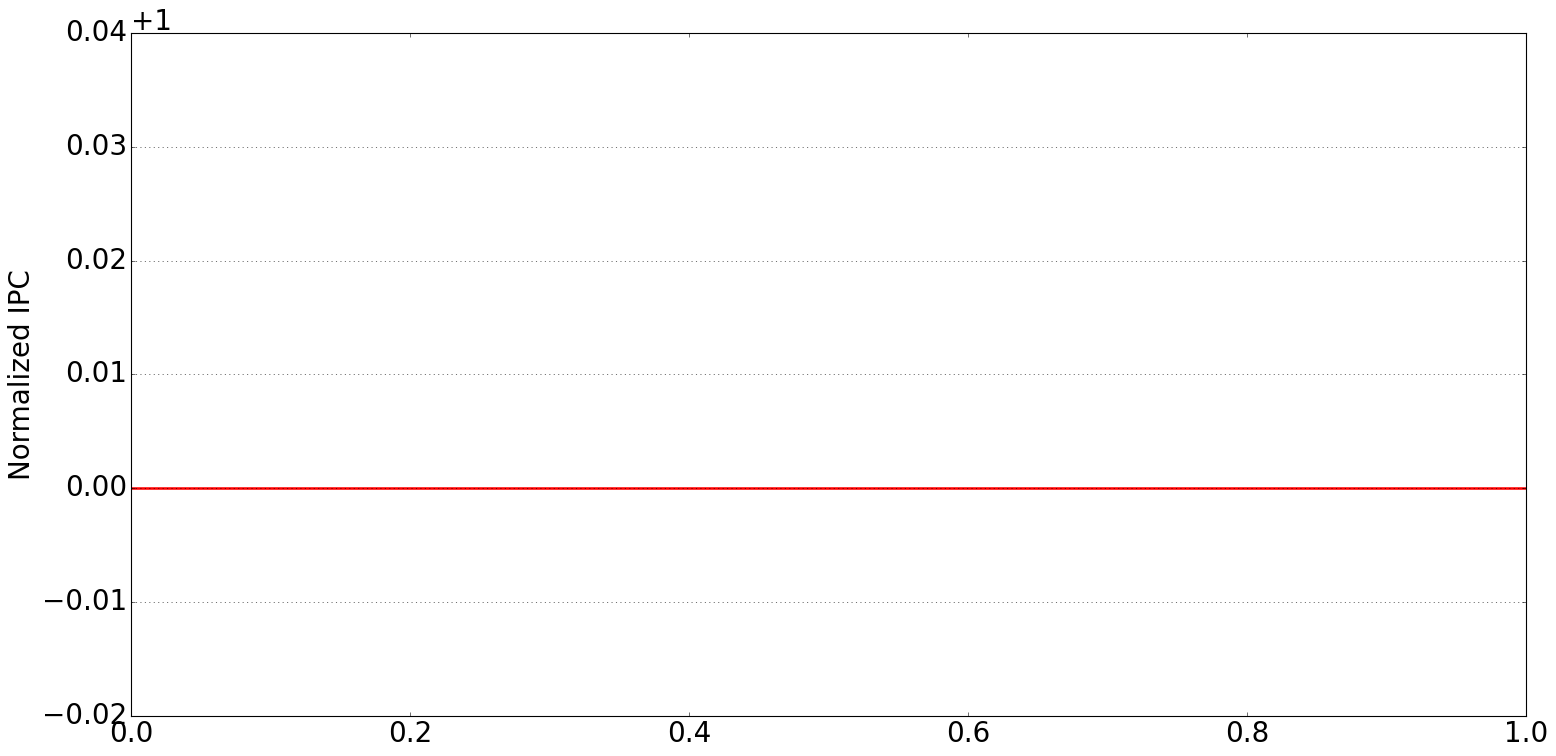

In [23]:
baseline = pd.read_csv('./data/replacement/cs/baseline.csv')
drrip = pd.read_csv('./data/replacement/cs/L1D/DRRIP.csv')
srrip = pd.read_csv('./data/replacement/cs/L1D/SRRIP.csv')
pacman = pd.read_csv('./data/replacement/cs/L1D/Pacman.csv')
# print(experiment)
normalized_ipc_drrip = drrip.IPC/baseline.IPC 
normalized_ipc_srrip = srrip.IPC/baseline.IPC 
normalized_ipc_pacman = pacman.IPC/baseline.IPC 

# type(normalized_ipc)
df = pd.DataFrame(
    index=baseline.Benchmarks,
)
df['SRRIP'] = normalized_ipc_srrip.to_list()
df['DRRIP'] = normalized_ipc_drrip.to_list()
df['Pacman'] = normalized_ipc_pacman.to_list()

df.loc['Geomean'] = geomean(df, 'SRRIP')
df.loc['Geomean']['DRRIP'] = geomean(df, 'DRRIP')
df.loc['Geomean']['Pacman'] = geomean(df, 'Pacman')

# df

df.plot(kind='bar', width=0.9, color=['#5bf5f5','#5c92ff','#ff9494'])
# # # 269ffc
# # # 94fff6

plt.axhline(y=1, c='r', linewidth=2.3)
plt.grid(axis='y')
plt.ylabel('Normalized IPC')
plt.ylim(0.98, 1.04)
plt.tight_layout()

# # plt.legend().remove()
# plt.savefig('L1D'+'.png')